Reference website for overview of GCN: [LINK](http://tkipf.github.io/graph-convolutional-networks/)

In [8]:
import networkx as nx 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

# Part 1: NumPy Example of GCN on Sample Dataset

Graph Info:
 Graph named 'G' with 6 nodes and 7 edges

Graph Nodes:  [(0, {'name': 0}), (1, {'name': 1}), (2, {'name': 2}), (3, {'name': 3}), (4, {'name': 4}), (5, {'name': 5})]


/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_81637/3724959495.py:22: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print('Graph Info:\n', nx.info(G))


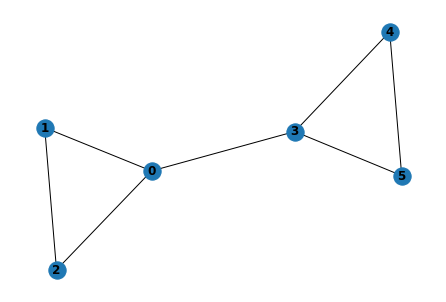

In [8]:
from scipy.linalg import fractional_matrix_power

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


#Initialize the graph
G = nx.Graph(name='G')

#Create nodes
#In this example, the graph will consist of 6 nodes.
#Each node is assigned node feature which corresponds to the node name
for i in range(6):
    G.add_node(i, name=i)


#Define the edges and the edges to the graph
edges = [(0,1),(0,2),(1,2),(0,3),(3,4),(3,5),(4,5)]
G.add_edges_from(edges)

#See graph info
print('Graph Info:\n', nx.info(G))

#Inspect the node features
print('\nGraph Nodes: ', G.nodes.data())

#Plot the graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [9]:
# Get the Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

print('Shape of A: ', A.shape)
print('\nShape of X: ', X.shape)
print('\nAdjacency Matrix (A):\n', A)
print('\nNode Features Matrix (X):\n', X)

Shape of A:  (6, 6)

Shape of X:  (6, 1)

Adjacency Matrix (A):
 [[0. 1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0.]]

Node Features Matrix (X):
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_81637/784659161.py:2: FutureWarning: attr_matrix will return an numpy.ndarray instead of a numpy.matrix in NetworkX 3.0.
  A = np.array(nx.attr_matrix(G, node_attr='name')[0])
/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_81637/784659161.py:3: FutureWarning: attr_matrix will return an numpy.ndarray instead of a numpy.matrix in NetworkX 3.0.
  X = np.array(nx.attr_matrix(G, node_attr='name')[1])


In [10]:
# Dot product Adjacency Matrix (A) and Node Features (X)
AX = np.dot(A,X)
print("Dot product of A and X (AX):\n", AX)

Dot product of A and X (AX):
 [[6.]
 [2.]
 [1.]
 [9.]
 [8.]
 [7.]]


#### The dot product of Adjacency Matrix and Node Features Matrix represents the sum of neighboring node features.
#### But, if we think about it more, we will realize that while AX sums up the adjacent node features, it does not take into account the features of the node itself.
* So we have to insert some self loops

In [11]:
# Add Self Loops
G_self_loops = G.copy()

self_loops = []
for i in range(G.number_of_nodes()):
    self_loops.append((i,i))

G_self_loops.add_edges_from(self_loops)

# Check the edges of G_self_loops after adding the self loops
print('Edges of G with self-loops:\n', G_self_loops.edges)

# Get the Adjacency Matrix (A) and Node Features Matrix (X) of added self-lopps graph
A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])
print('Adjacency Matrix of added self-loops G (A_hat):\n', A_hat)

# Calculate the dot product of A_hat and X (AX)
AX = np.dot(A_hat, X)
print('AX:\n', AX)

Edges of G with self-loops:
 [(0, 1), (0, 2), (0, 3), (0, 0), (1, 2), (1, 1), (2, 2), (3, 4), (3, 5), (3, 3), (4, 5), (4, 4), (5, 5)]
Adjacency Matrix of added self-loops G (A_hat):
 [[1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]
AX:
 [[ 6.]
 [ 3.]
 [ 3.]
 [12.]
 [12.]
 [12.]]


/var/folders/bd/3fcn_cld06z1y5f68_qm162m0000gn/T/ipykernel_81637/3005080699.py:14: FutureWarning: attr_matrix will return an numpy.ndarray instead of a numpy.matrix in NetworkX 3.0.
  A_hat = np.array(nx.attr_matrix(G_self_loops, node_attr='name')[0])


In [12]:
# Normalize the data by finding the dot product with degree matrix
#Get the Degree Matrix of the added self-loops graph
Deg_Mat = G_self_loops.degree()
print('Degree Matrix of added self-loops G (D): ', Deg_Mat)

#Convert the Degree Matrix to a N x N matrix where N is the number of nodes
D = np.diag([deg for (n,deg) in list(Deg_Mat)])
print('Degree Matrix of added self-loops G as numpy array (D):\n', D)

#Find the inverse of Degree Matrix (D)
D_inv = np.linalg.inv(D)
print('Inverse of D:\n', D_inv)

#Dot product of D and AX for normalization
DAX = np.dot(D_inv,AX)
print('DAX:\n', DAX)

Degree Matrix of added self-loops G (D):  [(0, 5), (1, 4), (2, 4), (3, 5), (4, 4), (5, 4)]
Degree Matrix of added self-loops G as numpy array (D):
 [[5 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 4 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
Inverse of D:
 [[0.2  0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.2  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25]]
DAX:
 [[1.2 ]
 [0.75]
 [0.75]
 [2.4 ]
 [3.  ]
 [3.  ]]


### Normalization from the paper 

In [16]:
# Symmetrically-normalization
D_half_norm = fractional_matrix_power(D, -0.5)
DADX = D_half_norm.dot(A_hat).dot(D_half_norm).dot(X)
print('DADX:\n', DADX)

DADX:
 [[1.27082039]
 [0.75      ]
 [0.75      ]
 [2.61246118]
 [2.92082039]
 [2.92082039]]


### Add Weights and Activation 

In [46]:
#Initialize the weights
np.random.seed(77777)
n_h = 4 #number of neurons in the hidden layer
n_y = 2 #number of neurons in the output layer
W0 = np.random.randn(X.shape[1],n_h) * 0.01
W1 = np.random.randn(n_h,n_y) * 0.01

#Implement ReLu as activation function
def relu(x):
    return np.maximum(0,x)

#Build GCN layer
#In this function, we implement numpy to simplify
def gcn(A,H,W):
    I = np.identity(A.shape[0]) #create Identity Matrix of A
    A_hat = A + I # add self-loop to A
    D = np.diag(np.sum(A_hat, axis=0)) #create Degree Matrix of A
    D_half_norm = fractional_matrix_power(D, -0.5) #calculate D to the power of -0.5
    eq = D_half_norm.dot(A_hat).dot(D_half_norm).dot(H).dot(W)
    return relu(eq)


#Do forward propagation
H1 = gcn(A,X,W0) # Layer one 
H2 = gcn(A,H1,W1) # Layer two
print('Features Representation from GCN output:\n', H2)

Features Representation from GCN output:
 [[0.00027758 0.        ]
 [0.00017298 0.        ]
 [0.00017298 0.        ]
 [0.00053017 0.        ]
 [0.00054097 0.        ]
 [0.00054097 0.        ]]


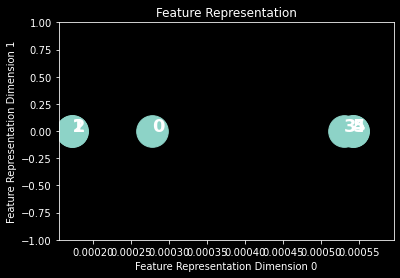

In [47]:

def plot_features(H2):
    #Plot the features representation
    x = H2[:,0]
    y = H2[:,1]

    size = 1000

    plt.scatter(x,y,size)
    plt.xlim([np.min(x)*0.9, np.max(x)*1.1])
    plt.ylim([-1, 1])
    plt.xlabel('Feature Representation Dimension 0')
    plt.ylabel('Feature Representation Dimension 1')
    plt.title('Feature Representation')

    for i,row in enumerate(H2):
        str = "{}".format(i)
        plt.annotate(str, (row[0],row[1]),fontsize=18, fontweight='bold')

    plt.show()


plot_features(H2)

# Part 2: Implement a 1 Layer GCN to Classify Node Label on CORA dataset

In [51]:
import networkx as nx 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder

In [9]:
# specify data source  
core_fp_edges, core_fp_nodes = "../data/raw/cora/cora/cora.cites", "../data/raw/cora/cora/cora.content"

# use the edges to create a graph; store the content to each nodes 
edges_df = pd.read_csv(core_fp_edges, names=["target", "source"], header=None, delimiter='\t')
print(edges_df.shape)
edges_df.head()

(5429, 2)


,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


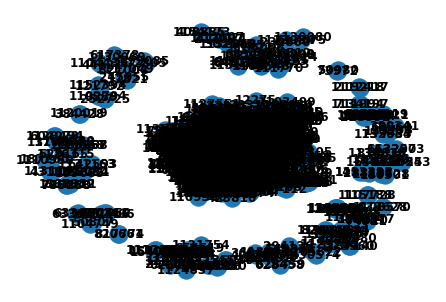

In [10]:
# create networkx graph object with edgelist 
cora_g = nx.from_pandas_edgelist(edges_df)
nx.draw(cora_g, with_labels=True, font_weight='bold')

In [11]:
# get the features of each paper 
columns = [f"word_{i}" for i in range(1433)] + ["subject"]
features_df = pd.read_csv(core_fp_nodes,names=columns, delimiter='\t')
features_df.head()

,word_0,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,...,word_1424,word_1425,word_1426,word_1427,word_1428,word_1429,word_1430,word_1431,word_1432,subject
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


In [12]:
# assign features to each nodes
nx.set_node_attributes(cora_g, features_df['subject'].to_dict(), "subject")
nx.get_node_attributes(cora_g, "subject")[1033] # check node subject assignment

'Genetic_Algorithms'

PyTorch alternative data source: torch-geometric

- Install with: conda install pyg -c pyg
- Load data: 
    ```{python} 
    from torch_geometric.datasets import Planetoid 
    dataset = Planetoid(root='~/somewhere/Cora', name='Cora')
    ```
- Visualize with: 
    ```{python}
    import networkx as nx 
    from torch_geometric.utils import to_networkx 
    G = to_networkx(data, to_undirected=True) nx.draw(G)
    ```

### Implement a GCN layer in PyTorch

In [17]:
import torch
from torch import nn
device = torch.device("cuda:0" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu"))
print(f"PyTorch is using {device}. ")


PyTorch is using mps. 


In [28]:
# New GCN layer definition
class GCNLayer(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, A, input_dim, output_dim):
        super().__init__()
        self.A = A # the adjacency matrix 
        self.I = torch.eye(self.A.shape[0]) # create identity matrix with the same shape as A 
        self.A =  self.A + self.I   # add self loop to A 
        self.D = torch.diag(torch.sum(self.A, dim=0)) # calculate the degree matrix with A after added self loop

        # for diagonal matrix, raising it to any power is the same as raising its diagonal elements to that power
        # we can just apply the -1/2 power to all element of this degree matrix 
        self.D_half_norm = torch.reciprocal(torch.sqrt(self.D)) 
        self.A_s = torch.mm(torch.mm(self.D_half_norm, self.A), self.D_half_norm) # normalized adjacency matrix

        # initialize the weight matrix for this layer 
        # the weight should have shape of (N , F) where N is the size of the input, and F is the output dimension
        self.W = torch.nn.Parameter(
            data=(torch.rand(input_dim, output_dim) * 0.01),  # times it by 0.001 to make the weight smaller
            requires_grad=True # weight should be trainable 
        )
        # create trainable a bias term for the layer
        self.b = torch.nn.Parameter(
            data=(torch.rand(output_dim) * 0.01),
            requires_grad=True # bias should be trainable 
        )

    def forward(self, H):
        return torch.mm(torch.mm(self.A_s, H), self.W) + self.b

In [47]:
# create a nodelist to retrieve node number from index 
nodelist = list(cora_g.nodes) 
nodelist[:5] # this is corresponding to the adjacency matrix 

[1033, 35, 103482, 103515, 1050679]

In [74]:
# get the adjacency matrix from established graph 
A = nx.to_numpy_matrix(cora_g, dtype=np.float32)  # unweighted adj matrix 
A = torch.from_numpy(A) # change it to a tensor object 

# encode the labesl labels 
categories = dict(zip(['Case_Based', 
                        'Genetic_Algorithms',
                        'Neural_Networks',
                        'Probabilistic_Methods',
                        'Reinforcement_Learning',
                        'Rule_Learning',
                        'Theory'
                    ], list(range(7))))
labels = features_df.loc[nodelist]['subject'] # get the actual label 
ohe = OneHotEncoder()
ohe.fit(labels.reset_index()) 
print("Onehot encoded categories: \n", ohe.categories_[0], "\n", ohe.categories_[1])
onehot_labels = ohe.transform(labels.reset_index()).todense()

# creates the training and testing dataset 
train_size = int(A.shape[0] * 0.66)
train_nodes, train_labels = A[:train_size], onehot_labels[:train_size]

test_nodes, test_labels = A[train_size:], onehot_labels[train_size:]


Onehot encoded categories: 
 [     35      40     114 ... 1154524 1154525 1155073] 
 ['Case_Based' 'Genetic_Algorithms' 'Neural_Networks'
 'Probabilistic_Methods' 'Reinforcement_Learning' 'Rule_Learning' 'Theory']


In [75]:

# check encoded label
ohe.inverse_transform(onehot_labels[0]) # should be 1033: "Genetic_Algorithms"

/Users/barryxue/miniforge3/envs/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[1033, 'Genetic_Algorithms']], dtype=object)

In [46]:
training_features

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [33]:
# create a 1 layer classification model with softmax output
class oneLayerGCN(nn.Module): 
    def __init__(self, adjacency_matrix, output_size) -> None:
        """
        Parameters: 
            adjacency_matrix: tensor, a tensor representing the link connection between nodes
            output_size: input, the number of target label we have for our prediction
        """
        super().__init__()
        self.A = adjacency_matrix
        self.output_size = output_size
        self.hidden_conv_layer = GCNLayer(A=self.A, input_dim=self.A.shape[0], output_dim=self.output_size)
        self.softmax = nn.Softmax()

    def forward(self, X): 
        """
        Parameters: 
            X: tensor, the link feature of the nodes in the dataset
        """
        output = self.hidden_conv_layer(X) # get the hidden embedding
        output = self.softmax(output)
        return output


In [31]:
# Set up the training parameter 
one_layer_GCN = oneLayerGCN(adjacency_matrix=A, output_size=)


GCNLayer()